#  PCA

## Import Packages and Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
income = pd.read_csv("../data/adult.csv")
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Preprocessing

In [3]:
si = SimpleImputer(missing_values='?', strategy='most_frequent')
median_imputation = si.fit_transform(income)
median_imputation

array([[25, 'Private', 226802, ..., 40, 'United-States', '<=50K'],
       [38, 'Private', 89814, ..., 50, 'United-States', '<=50K'],
       [28, 'Local-gov', 336951, ..., 40, 'United-States', '>50K'],
       ...,
       [58, 'Private', 151910, ..., 40, 'United-States', '<=50K'],
       [22, 'Private', 201490, ..., 20, 'United-States', '<=50K'],
       [52, 'Self-emp-inc', 287927, ..., 40, 'United-States', '>50K']],
      dtype=object)

In [4]:
income_encoded = pd.DataFrame(median_imputation).apply(LabelEncoder().fit_transform)
income_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,8,3,19329,1,6,4,6,3,2,1,0,0,39,38,0
1,21,3,4212,11,8,2,4,0,4,1,0,0,49,38,0
2,11,1,25340,7,11,2,10,0,4,1,0,0,39,38,1
3,27,3,11201,15,9,2,6,0,2,1,98,0,39,38,1
4,1,3,5411,15,9,4,9,3,4,0,0,0,29,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10,3,21582,7,11,2,12,5,4,0,0,0,37,38,0
48838,23,3,10584,11,8,2,6,0,4,1,0,0,39,38,1
48839,41,3,10316,11,8,6,0,4,4,0,0,0,39,38,0
48840,5,3,16813,11,8,4,0,3,4,1,0,0,19,38,0


## PCA Fitting

In [6]:
pca_pipeline = make_pipeline(StandardScaler(),
                             PCA(n_components=2))
X = pca_pipeline.fit_transform(income_encoded)
X

array([[-1.95629599,  1.81071401],
       [ 0.68625207,  0.77210089],
       [ 1.24165742,  0.14467474],
       ...,
       [-1.92143028, -0.79757064],
       [-1.77179957,  0.02017293],
       [ 0.68350376, -1.96622476]])

<AxesSubplot:>

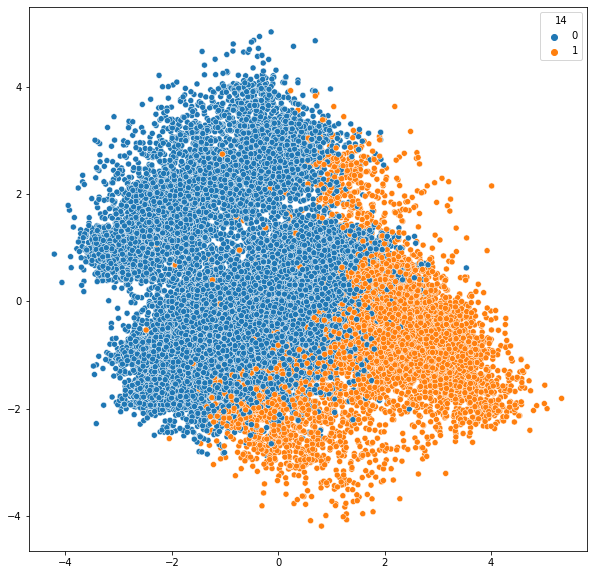

In [33]:

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=income_encoded.iloc[:, -1], ax=ax)

## Models

### KNN Grid Search

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, income_encoded.iloc[:, -1], test_size=.20)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 23}

In [37]:
knn_gscv.best_score_

0.9434392524466396

In [39]:
knn_gscv.best_estimator_.score(X_test, y_test)

0.9403214249155492